<h1> LABORATORIO 6  APRENDIZAJE NO SUPERVISADO</h1>
<h2> ING DE SISTEMAS</h2>
<h3> Juan Sebastian Delgadillo Llanos</h3>
<h3> Rodrigo Jairo Loaiza Coronado</h3>
<h3> Diego Roberto Arancibia Delgado</h3>



In [135]:
# Importing necessary libraries
from matplotlib import pyplot as plt
import os
import numpy as np
import pandas as pd
from scipy import optimize
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, StandardScaler
# from google.colab import drive
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [136]:
# Mount Google Drive
# drive.mount('/content/drive')

In [137]:
# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

In [138]:
data = pd.read_csv('E:\\Pacheco\\sis420-\\datasets\\Churn_Modelling.csv', delimiter=",")

data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [139]:

# Convertir características categóricas en variables numéricas usando codificación de etiquetas
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data = data.drop(['CustomerId', 'Surname',], axis=1)
# Paso 3: Normalización de características
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=[np.number]))
# Eliminar las columnas 'CustomerId' y 'Surname'



In [140]:
data

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [141]:
scaled_data

array([[-1.73187761, -0.32622142, -0.90188624, ...,  0.97024255,
         0.02188649,  1.97716468],
       [-1.7315312 , -0.44003595,  1.51506738, ...,  0.97024255,
         0.21653375, -0.50577476],
       [-1.73118479, -1.53679418, -0.90188624, ..., -1.03067011,
         0.2406869 ,  1.97716468],
       ...,
       [ 1.73118479,  0.60498839, -0.90188624, ...,  0.97024255,
        -1.00864308,  1.97716468],
       [ 1.7315312 ,  1.25683526,  0.30659057, ..., -1.03067011,
        -0.12523071,  1.97716468],
       [ 1.73187761,  1.46377078, -0.90188624, ..., -1.03067011,
        -1.07636976, -0.50577476]])

In [142]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)


y_pred = kmeans.fit_predict(scaled_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
y_pred

array([2, 0, 2, ..., 2, 2, 0])

In [143]:
kmeans.cluster_centers_

array([[-6.79523130e-03,  2.35870345e-02,  3.94949337e-02,
         7.46763896e-02, -1.42381754e-01, -1.21432106e-02,
         7.28746355e-01, -3.47914752e-01, -6.12402968e-03,
         9.40032238e-02,  1.01358648e-02, -5.05774765e-01],
       [ 3.16762012e-02, -4.88117577e-04, -9.81452944e-02,
         2.54820019e-02, -1.47641306e-01,  3.26729173e-02,
        -1.14772536e+00,  5.57023620e-01,  1.53732732e-02,
         5.99281052e-02, -2.60113568e-02, -4.86641266e-01],
       [-3.75512234e-02, -5.33104205e-02,  7.40293904e-02,
        -2.14126212e-01,  5.74457266e-01, -2.69505250e-02,
         2.53237654e-01, -1.36136805e-01, -1.17389492e-02,
        -3.16271658e-01,  2.03805578e-02,  1.97716468e+00]])

In [144]:
import numpy as np

# Seleccionar muestras del conjunto de datos preprocesado y normalizado
X_samples = scaled_data[np.random.choice(scaled_data.shape[0], 4, replace=False)]

# Imprimir las muestras seleccionadas
print("Muestras seleccionadas:")
print(X_samples)

# Utilizar el modelo KMeans para predecir el cluster de las nuevas muestras
y_pred = kmeans.predict(X_samples)
print("Predicciones de cluster para las nuevas muestras:")
print(y_pred)

Muestras seleccionadas:
[[-1.62379764 -0.08824558 -0.90188624  0.91241915 -0.08789694 -0.69598177
  -1.22584767  0.80773656 -1.54776799 -1.03067011  1.24111541 -0.50577476]
 [-1.30510029 -0.65731824  0.30659057  0.91241915  0.67493179  1.37868567
   0.50268916 -0.91158349  0.64609167 -1.03067011  0.68409651  1.97716468]
 [ 0.49103641  1.44307722  1.51506738  0.91241915 -0.18325053  0.34135195
  -1.22584767  0.80773656  0.64609167  0.97024255  0.33723828 -0.50577476]
 [-0.04520653  0.19111736 -0.90188624  0.91241915  1.05634615 -0.35020386
   1.17362865  2.52705662  0.64609167  0.97024255  0.43093735  1.97716468]]
Predicciones de cluster para las nuevas muestras:
[1 2 1 2]


<h1> CALCULAMOS EL VALOR OPTIMO DE CLOUSTERS USANDO EL METODO DEL CODO Y EL METODO DE LA SILUETA</h1>

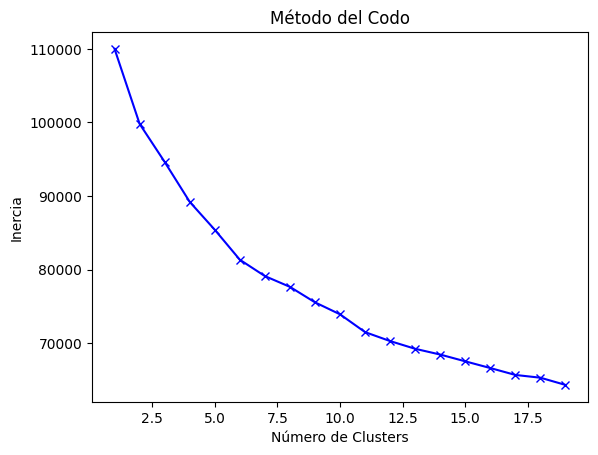

El número óptimo de clusters según el método del codo es: 19


In [145]:
import numpy as np
none_y = scaled_data[:, :-1]

inertias = []
k_range = range(1, 20)  # Prueba con un rango de 1 a 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(none_y)
    inertias.append(kmeans.inertia_)

# Graficar la curva de inercia
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()
best_codo_index = np.argmin(inertias)
best_num_clusters_codo = best_codo_index + 1  # Sumamos 1 ya que comenzamos desde 1 cluster
print("El número óptimo de clusters según el método del codo es:", best_num_clusters_codo)



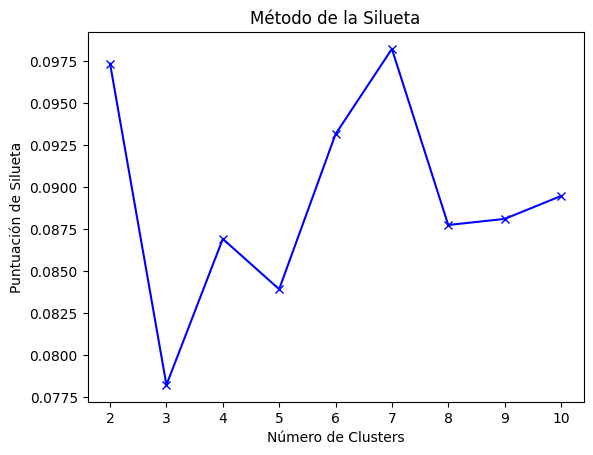

El número óptimo de clusters según la puntuación de silueta es: 7


In [146]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 11)  # Prueba con un rango de 2 a 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(none_y)
    silhouette_avg = silhouette_score(none_y, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar la curva de silueta
plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de Silueta')
plt.title('Método de la Silueta')
plt.show()
best_silhouette_index = np.argmax(silhouette_scores)
best_num_clusters = best_silhouette_index + 2  # Sumamos 2 ya que comenzamos desde 2 clusters
print("El número óptimo de clusters según la puntuación de silueta es:", best_num_clusters)


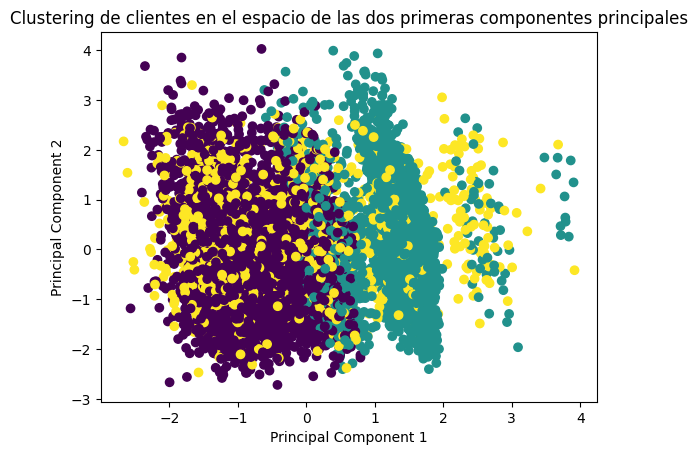

In [147]:
# Reducción de dimensionalidad con PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(none_y)

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering de clientes en el espacio de las dos primeras componentes principales')
plt.show()


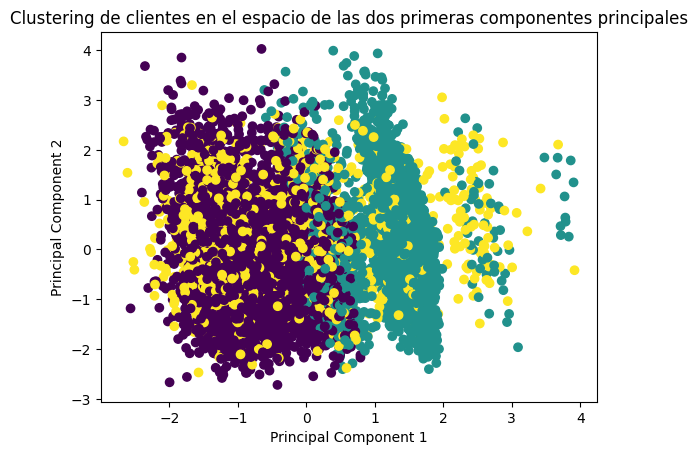

In [148]:
from sklearn.decomposition import PCA

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(none_y)

# Trama de dispersión de los clusters en las dos primeras componentes principales
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering de clientes en el espacio de las dos primeras componentes principales')
plt.show()

In [149]:
none_y

array([[-1.73187761, -0.32622142, -0.90188624, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.7315312 , -0.44003595,  1.51506738, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.73118479, -1.53679418, -0.90188624, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 1.73118479,  0.60498839, -0.90188624, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.7315312 ,  1.25683526,  0.30659057, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.73187761,  1.46377078, -0.90188624, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [150]:
# Separar los datos en entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
X_train = train_data
y_train = train_data['Exited']
X_test = test_data
y_test = test_data['Exited']

print('-' * 80)
print(f"El 80% de ejemplos que serán para el entrenamiento son: {len(X_train)}")
print(f"El 20% de ejemplos que serán para el prueba son: {len(X_test)}")

--------------------------------------------------------------------------------
El 80% de ejemplos que serán para el entrenamiento son: 8000
El 20% de ejemplos que serán para el prueba son: 2000


In [151]:
# Normalizar los datos
scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train)
X_test_ = scaler.transform(X_test)

In [152]:
X_train_

array([[ 1.4692775 ,  0.35649971, -0.9055496 , ...,  0.97481699,
         1.36766974, -0.50857963],
       [-1.19499359, -0.20389777,  0.30164867, ...,  0.97481699,
         1.6612541 , -0.50857963],
       [-1.15724427, -0.96147213,  1.50884694, ..., -1.02583358,
        -0.25280688,  1.96626042],
       ...,
       [ 0.13108128,  0.86500853, -0.9055496 , ..., -1.02583358,
        -0.1427649 ,  1.96626042],
       [-1.43776677,  0.15932282, -0.9055496 , ..., -1.02583358,
        -0.05082558,  1.96626042],
       [ 0.78217054,  0.47065475,  0.30164867, ...,  0.97481699,
        -0.81456811, -0.50857963]])

In [153]:
# KMeans clustering on training data
kmeans = KMeans(n_clusters=best_num_clusters, n_init=10, random_state=42)
kmeans.fit(X_train_)
train_data['kmeans3'] = kmeans.labels_

# Este método ajusta el modelo K-Means utilizando el conjunto de datos X_train y
# Transformamos los datos de entrenamiento en distancias euclidianas a los centroides
X_digits_dist = kmeans.transform(X_train_)


In [154]:
# Mostramos el número de ejemplos en cada grupo.
print(X_digits_dist.shape)
print(X_digits_dist)

(8000, 7)
[[4.39569945 3.87384258 3.55110073 ... 4.62654825 2.53424232 3.89858043]
 [3.86064667 3.20928421 3.41798417 ... 4.11052747 3.45161774 3.35337724]
 [4.27634251 4.69756186 4.2600308  ... 3.28805543 4.90413214 3.76040024]
 ...
 [3.2338791  5.2122456  4.85089366 ... 4.67388866 4.23080446 5.04038489]
 [4.06505264 4.53218646 5.33321727 ... 2.93927191 4.83063962 3.64029298]
 [4.63328385 3.11522339 3.99196739 ... 3.75976922 4.03997284 3.41109862]]


In [155]:
# Logistic Regression
# Logistic Regression
logistic_regression = LogisticRegression()

# Ajustar el modelo de regresión logística
logistic_regression.fit(X_train, y_train)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Ahora puedes predecir con el conjunto de prueba
y_pred = logistic_regression.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Porcentaje de precisión:", accuracy)

Porcentaje de precisión: 0.732


C:\Users\Asus-Rog\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


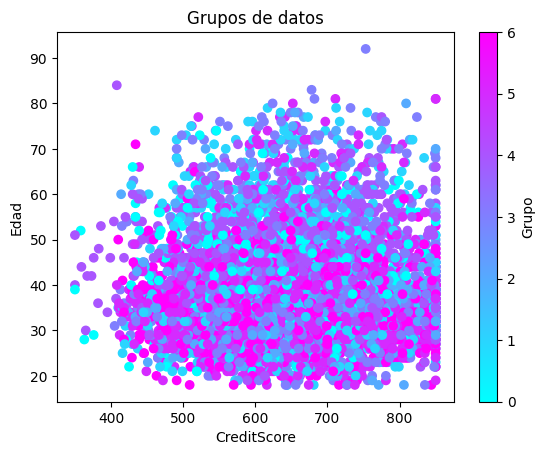

In [156]:
# Asumiendo que 'kmeans' es tu modelo KMeans ya ajustado
train_data['kmeans_3'] = kmeans.labels_

# Ahora puedes graficar los grupos
plt.scatter(train_data['CreditScore'], train_data['Age'], c=train_data['kmeans_3'], cmap='cool')
plt.xlabel('CreditScore')
plt.ylabel('Edad')
plt.title('Grupos de datos')
plt.colorbar(label='Grupo')
plt.show()

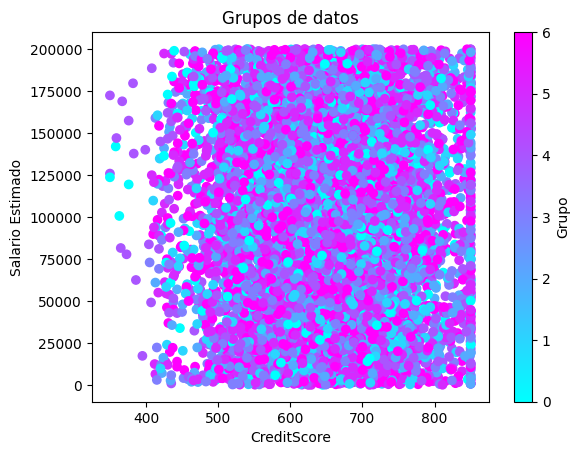

In [157]:
plt.scatter(train_data['CreditScore'], train_data['EstimatedSalary'], c=train_data['kmeans_3'], cmap='cool')
plt.xlabel('CreditScore')
plt.ylabel('Salario Estimado')
plt.title('Grupos de datos')
plt.colorbar(label='Grupo')
plt.show()

In [158]:
# Supongamos que tienes algunos datos para predecir
# Por ejemplo, tomaremos la primera fila del conjunto de prueba
# Asegúrate de ajustar los datos según corresponda a tu conjunto de datos
datos_nuevos = X_test.iloc[1000]

# Convertir datos_nuevos a un DataFrame con los nombres de las columnas preservados
datos_nuevos_df = pd.DataFrame([datos_nuevos], columns=X_test.columns)

# Realizar la predicción utilizando el modelo entrenado
prediccion = logistic_regression.predict(datos_nuevos_df)

# Imprimir la predicción
print("Predicción:", prediccion)



Predicción: [0]


# **APRENDIZAJE SEMI SUPERVIZADO**
Imagina que el dataset no estuviese etiquetado, es decir, que tuviésemos solo los dígitos sin la clase (sólo  X  y no  y ) y tampoco supiésemos cuantas clases diferentes tenemos. Lo primero que podríamos hacer es entrenar un modelo de K-Means con, por ejemplos, 50 grupos. De esta manera encontraremos aquellos valores más representativas de cada grupo.

In [159]:
k = 50
kmeans = KMeans(n_clusters=k,n_init=10, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)

In [160]:
idxs = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train.values[idxs]

print(X_representative_digits)

[[4.8650000e+03 7.3700000e+02 0.0000000e+00 1.0000000e+00 5.4000000e+01
  9.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00 0.0000000e+00
  8.3470400e+04 1.0000000e+00 4.0000000e+00 4.0000000e+00]
 [4.0730000e+03 8.1000000e+02 0.0000000e+00 0.0000000e+00 3.8000000e+01
  9.0000000e+00 1.5316617e+05 1.0000000e+00 1.0000000e+00 1.0000000e+00
  9.3261690e+04 0.0000000e+00 1.0000000e+00 1.0000000e+00]
 [4.4210000e+03 7.1400000e+02 1.0000000e+00 0.0000000e+00 3.5000000e+01
  6.0000000e+00 1.2607743e+05 2.0000000e+00 1.0000000e+00 1.0000000e+00
  5.3954240e+04 0.0000000e+00 1.0000000e+00 1.0000000e+00]
 [4.1360000e+03 7.1200000e+02 0.0000000e+00 0.0000000e+00 2.9000000e+01
  3.0000000e+00 8.7375780e+04 2.0000000e+00 0.0000000e+00 0.0000000e+00
  1.6619453e+05 0.0000000e+00 6.0000000e+00 6.0000000e+00]
 [5.4330000e+03 5.9900000e+02 2.0000000e+00 1.0000000e+00 5.1000000e+01
  0.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
  1.7523599e+05 0.0000000e+00 2.0000000e+00 

In [161]:
y_representative_digits = y_train.values[idxs]


Y entrenaremos un clasificados usando las mas representativas.

In [162]:
log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg2.fit(X_representative_digits, y_representative_digits)

import numpy as np

# Asegúrate de que X_test tenga la misma forma que X_representative_digits
if X_test.shape[1] < X_representative_digits.shape[1]:
    # Añade columnas de ceros a X_test
    zeros = np.zeros((X_test.shape[0], X_representative_digits.shape[1] - X_test.shape[1]))
    X_test = np.hstack((X_test, zeros))

# Ahora puedes calcular el score
score = log_reg2.score(X_test, y_test)
print("Score:", score)

CPU times: total: 328 ms
Wall time: 332 ms
Score: 0.9705


C:\Users\Asus-Rog\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Como puedes observar hemos obtenido una precisión de casi el  80  habiendo anotado simplemente 50 datos, pero aquellas más representativas. Entrenar el mismo modelo con 50 datos aleatorias nos daría peores resultados.

In [163]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg.fit(X_train[:50], y_train[:50])
log_reg.score(X_test, y_test)

CPU times: total: 328 ms
Wall time: 329 ms


C:\Users\Asus-Rog\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asus-Rog\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.551

Esto pone de manifiesto que a la hora de entrenar modelos de ML no es tan importante la cantidad de datos, sino la calidad.

Ahora que tenemos un clasificador, podemos usarlo para anotar de manera automática el resto de datos. Para ello asignaremos, en cada grupo, la misma etiqueta a todas las muestras que la muestra representativa.

In [164]:
y_train_propagated = np.empty(len(X_train))
for i in range(k):
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [165]:
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg3.fit(X_train[:1000], y_train_propagated[:1000])
log_reg3.score(X_test, y_test)

CPU times: total: 1.2 s
Wall time: 1.08 s


C:\Users\Asus-Rog\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asus-Rog\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7545

# **APRENDIZAJE ACTIVO**

El aprendizaje activo (o Active Learning) consiste en entrenar modelos de ML de manera iterativa, incluyendo en cada iteración nuevas muestras al dataset focalizando en ejemplos en loa que el modelo tenga más problemas.

In [166]:
probas = log_reg3.predict_proba(X_train[:1000])
labels_ixs = np.argmax(probas, axis=1)
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])
sorted_ixs = np.argsort(labels)
labels[sorted_ixs[:10]]

array([0.50007358, 0.50076003, 0.5016109 , 0.50171367, 0.50210851,
       0.50233074, 0.50310489, 0.50324439, 0.5034032 , 0.50381647])

In [167]:
print(X_train.values)

[[9.255e+03 6.860e+02 0.000e+00 ... 0.000e+00 5.000e+00 5.000e+00]
 [1.562e+03 6.320e+02 1.000e+00 ... 0.000e+00 3.000e+00 3.000e+00]
 [1.671e+03 5.590e+02 2.000e+00 ... 1.000e+00 4.000e+00 4.000e+00]
 ...
 [5.391e+03 7.350e+02 0.000e+00 ... 1.000e+00 0.000e+00 0.000e+00]
 [8.610e+02 6.670e+02 0.000e+00 ... 1.000e+00 4.000e+00 4.000e+00]
 [7.271e+03 6.970e+02 1.000e+00 ... 0.000e+00 3.000e+00 3.000e+00]]


In [168]:
y_lowest = y_train.values[:1000][sorted_ixs[:k]]
y_lowest

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0], dtype=int64)

In [169]:
y_train2 = y_train_propagated[:1000].copy()
y_train2[sorted_ixs[:k]] = y_lowest

In [170]:
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg5.fit(X_train[:1000], y_train2)
log_reg5.score(X_test, y_test)

CPU times: total: 1.31 s
Wall time: 1.07 s


C:\Users\Asus-Rog\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asus-Rog\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7615

Podemos repetir el proceso tantas veces como haga falta hasta llegar a las prestaciones requeridas.